In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv(r'C:\Users\umang\Data Science\Data Sets\Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
x = data.iloc[:,0].values
y = data.iloc[:,1].values

In [5]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [1]:
y

NameError: name 'y' is not defined

In [7]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [65]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

fit_intercept : boolean, optional, default True
whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).

normalize : boolean, optional, default False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.

copy_X : boolean, optional, default True
If True, X will be copied; else, it may be overwritten.

n_jobs : int or None, optional (default=None)
The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

In [46]:
from sklearn.linear_model import LinearRegression
Lin = LinearRegression()
Lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
y_pred = Lin.predict(x_test)

In [48]:
y_test[3]   # actual value

array([63218.])

In [49]:
y_pred[3]   # predicted value

array([63099.14214487])

In [ ]:
# checking by plotting

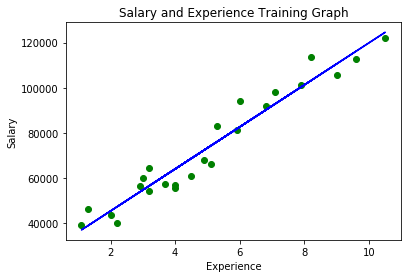

In [57]:
plt.scatter(x_train,y_train,color='green')  ## plotting training data (actual values)
plt.plot(x_train,Lin.predict(x_train),color='blue')  ## ploting regression line of training
plt.title("Salary and Experience Training Graph")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

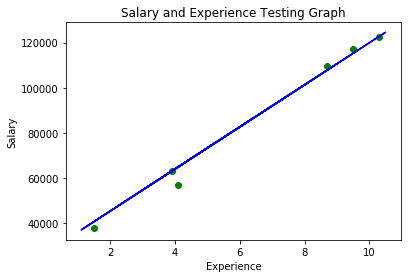

In [60]:
plt.scatter(x_test,y_test,color='green')  ## plotting testing data (actual values)
plt.plot(x_train,Lin.predict(x_train),color='blue')  ## ploting regression line
plt.title("Salary and Experience Testing Graph")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

#### result verification

In [62]:
# y = mx + b   m=slope or coefficient  b = intercept  x= X_test

In [63]:
Lin.coef_   ## value of m

array([[9312.57512673]])

In [64]:
Lin.intercept_   ## value of b

array([26780.09915063])

In [69]:
# mx + b
9312.57512673 * 1.5 + 26780.09915063

# verify the value of y(salary) of x(experience) in original data

40748.961840725

In [81]:
9312.57512673 * 4.1 + 26780.09915063

64961.657170223

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.988169515729126